<a href="https://colab.research.google.com/github/noahruiz416/Houston-Astros-Regression-Model/blob/main/Astros_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Exploratory Data Analysis for Baseball Data for the Houston Astros. STP 429 Class project

In [ ]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_csv("/Users/n/Downloads/sportsref_download.csv")

In [ ]:
df_reduced = df[['R','R/G', 'OBP', 'SLG', 'OPS', 'RBI' ,'W']]

In [ ]:
#runs, rg, RBI, OBP, SLG, OPS all seem like strongly correlated variables
df_reduced.corr()

,R,R/G,OBP,SLG,OPS,RBI,W
R,1.000000,0.974157,0.881325,0.915208,0.937689,0.996656,0.680886
R/G,0.974157,1.000000,0.922666,0.942432,0.969604,0.974509,0.669312
OBP,0.881325,0.922666,1.000000,0.838394,0.916501,0.877501,0.641280
SLG,0.915208,0.942432,0.838394,1.000000,0.986382,0.931190,0.600541
OPS,0.937689,0.969604,0.916501,0.986382,1.000000,0.948296,0.636136
RBI,0.996656,0.974509,0.877501,0.931190,0.948296,1.000000,0.681878
W,0.680886,0.669312,0.641280,0.600541,0.636136,0.681878,1.000000


In [ ]:
normalized_df=(df-df.mean())/df.std()

/var/folders/r0/y9b4_lnn259c9_y88x0_8mrr0000gn/T/ipykernel_15721/209819120.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df=(df-df.mean())/df.std()


In [ ]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
filter1 = df['Year'] <= 2000
filter2 = df['Year'] > 2000

old_df = df.where(filter1)
new_df = df.where(filter2)

In [ ]:
norm_old=(old_df-old_df.mean())/old_df.std()
norm_new=(new_df-new_df.mean())/new_df.std()

/var/folders/r0/y9b4_lnn259c9_y88x0_8mrr0000gn/T/ipykernel_15721/3867482322.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  norm_old=(old_df-old_df.mean())/old_df.std()
/var/folders/r0/y9b4_lnn259c9_y88x0_8mrr0000gn/T/ipykernel_15721/3867482322.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  norm_new=(new_df-new_df.mean())/new_df.std()


## From This Point we are concerned with exploring each seperate block of the data set this portion will be model 1

<AxesSubplot:xlabel='2B', ylabel='Count'>

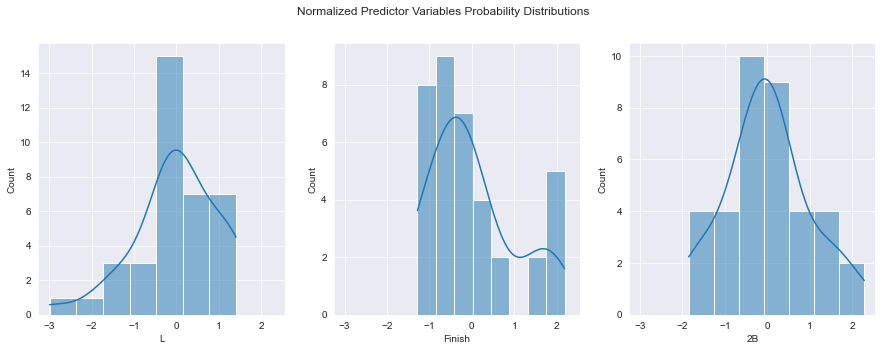

In [ ]:
#Old Time Frame
#this block of code creates a large summation of the plots created above
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
figure.suptitle('Normalized Predictor Variables Probability Distributions')
sns.set_style("darkgrid")
#plots
sns.histplot(ax=axes[0], data=norm_old, x='L',kde = True)
sns.histplot(ax=axes[1], data=norm_old, x='Finish',kde = True)
sns.histplot(ax=axes[2], data=norm_old, x='2B',kde = True)

<AxesSubplot:xlabel='W', ylabel='Count'>

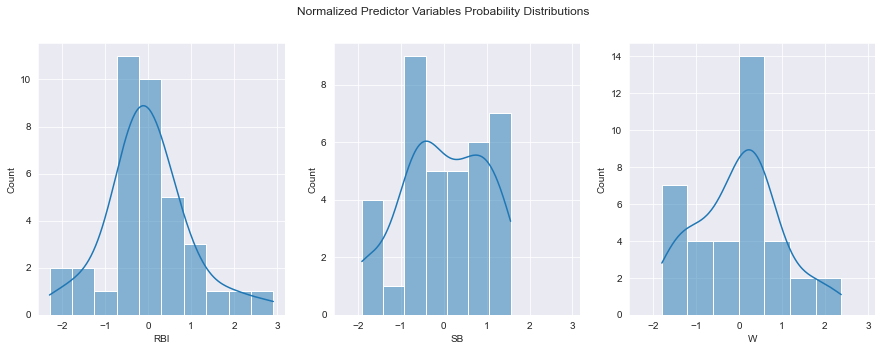

In [ ]:
#Old Time Frame
#this block of code creates a large summation of the plots created above
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
figure.suptitle('Normalized Predictor Variables Probability Distributions')
sns.set_style("darkgrid")
#plots
sns.histplot(ax=axes[0], data=norm_old, x='RBI',kde = True)
sns.histplot(ax=axes[1], data=norm_old, x='SB',kde = True)
sns.histplot(ax=axes[2], data=norm_old, x='W',kde = True)

<AxesSubplot:xlabel='W'>

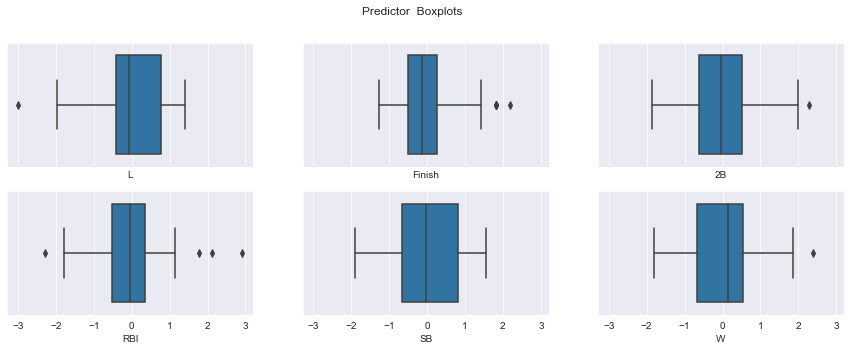

In [ ]:
#Aggregated boxplots
#plots 
sns.set_style("darkgrid")
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(15,5))
figure.suptitle('Predictor  Boxplots')
sns.boxplot(ax=axes[0, 0], data=norm_old, x='L')
sns.boxplot(ax=axes[0, 1], data=norm_old, x='Finish')
sns.boxplot(ax=axes[0, 2], data=norm_old, x='2B')
sns.boxplot(ax=axes[1, 0], data=norm_old, x='RBI')
sns.boxplot(ax=axes[1, 1], data=norm_old, x='SB')
sns.boxplot(ax=axes[1, 2], data=norm_old, x='W')

#titles

<AxesSubplot:xlabel='2B', ylabel='W'>

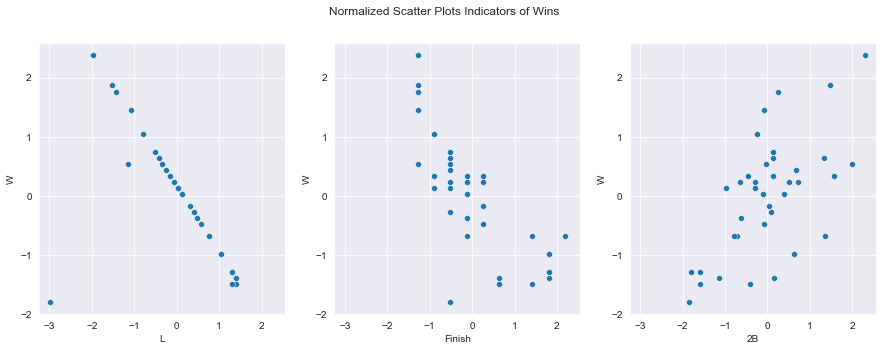

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
figure.suptitle('Normalized Scatter Plots Indicators of Wins')
sns.set_style("darkgrid")
sns.scatterplot(ax=axes[0], data=norm_old, x='L', y='W')
sns.scatterplot(ax=axes[1], data=norm_old, x='Finish', y='W')
sns.scatterplot(ax=axes[2], data=norm_old, x='2B', y='W')

<AxesSubplot:xlabel='H', ylabel='W'>

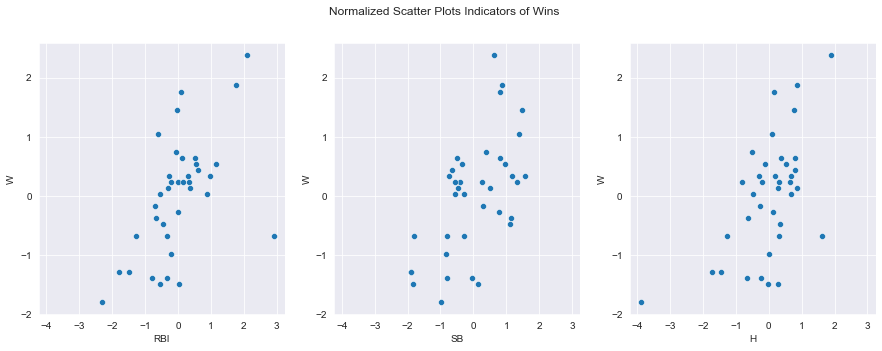

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
figure.suptitle('Normalized Scatter Plots Indicators of Wins')
sns.set_style("darkgrid")
sns.scatterplot(ax=axes[0], data=norm_old, x='RBI', y='W')
sns.scatterplot(ax=axes[1], data=norm_old, x='SB', y='W')
sns.scatterplot(ax=axes[2], data=norm_old, x='H', y='W')

## Model 2 EDA

<AxesSubplot:xlabel='R', ylabel='Count'>

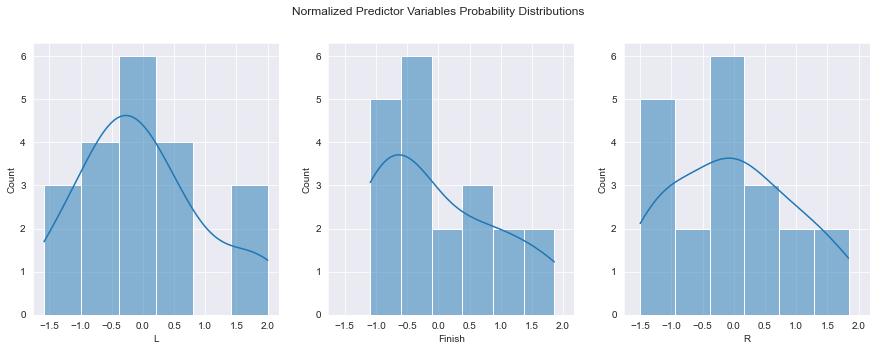

In [ ]:
#Old Time Frame
#this block of code creates a large summation of the plots created above
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
figure.suptitle('Normalized Predictor Variables Probability Distributions')
sns.set_style("darkgrid")
#plots
sns.histplot(ax=axes[0], data=norm_new, x='L',kde = True)
sns.histplot(ax=axes[1], data=norm_new, x='Finish',kde = True)
sns.histplot(ax=axes[2], data=norm_new, x='R',kde = True)

<AxesSubplot:xlabel='W', ylabel='Count'>

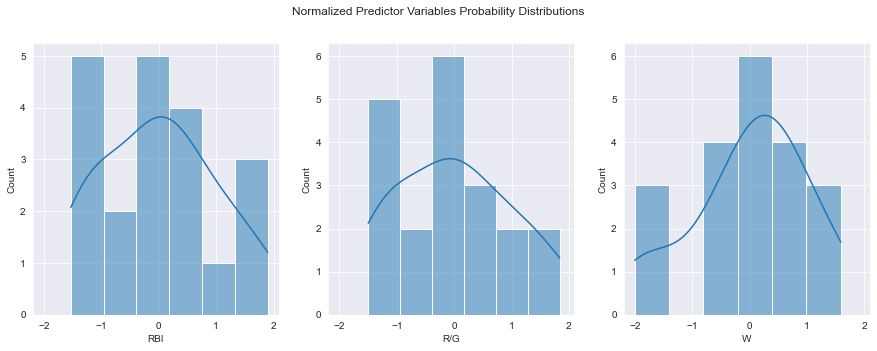

In [ ]:
#Old Time Frame
#this block of code creates a large summation of the plots created above
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
figure.suptitle('Normalized Predictor Variables Probability Distributions')
sns.set_style("darkgrid")
#plots
sns.histplot(ax=axes[0], data=norm_new, x='RBI',kde = True)
sns.histplot(ax=axes[1], data=norm_new, x='R/G',kde = True)
sns.histplot(ax=axes[2], data=norm_new, x='W',kde = True)

<AxesSubplot:xlabel='W'>

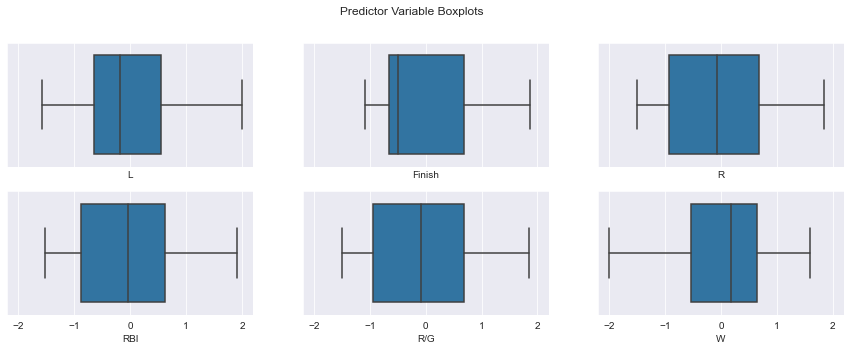

In [ ]:
#Aggregated boxplots

#plots 
sns.set_style("darkgrid")
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(15,5))
figure.suptitle('Predictor Variable Boxplots')
sns.boxplot(ax=axes[0, 0], data=norm_new, x='L')
sns.boxplot(ax=axes[0, 1], data=norm_new, x='Finish')
sns.boxplot(ax=axes[0, 2], data=norm_new, x='R')
sns.boxplot(ax=axes[1, 0], data=norm_new, x='RBI')
sns.boxplot(ax=axes[1, 1], data=norm_new, x='R/G')
sns.boxplot(ax=axes[1, 2], data=norm_new, x='W')

<AxesSubplot:xlabel='R', ylabel='W'>

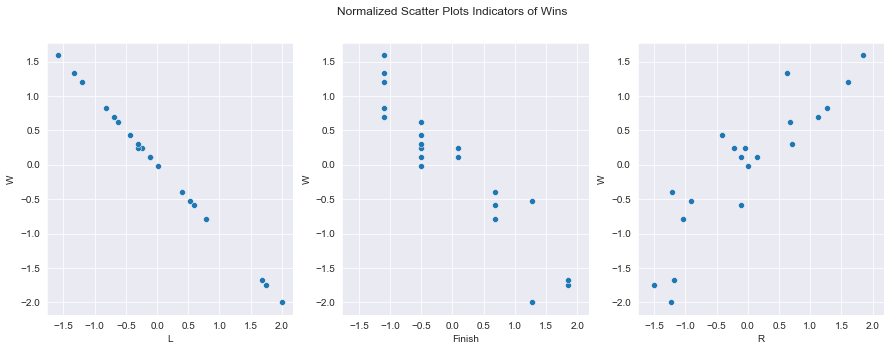

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
figure.suptitle('Normalized Scatter Plots Indicators of Wins')
sns.set_style("darkgrid")
sns.scatterplot(ax=axes[0], data=norm_new, x='L', y='W')
sns.scatterplot(ax=axes[1], data=norm_new, x='Finish', y='W')
sns.scatterplot(ax=axes[2], data=norm_new, x='R', y='W')

<AxesSubplot:xlabel='W', ylabel='W'>

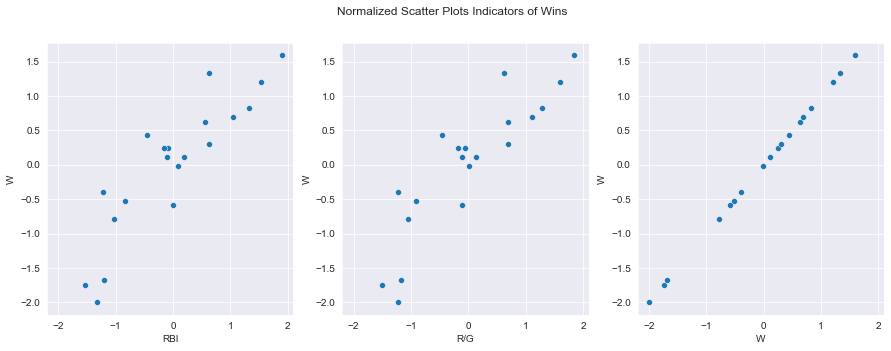

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
figure.suptitle('Normalized Scatter Plots Indicators of Wins')
sns.set_style("darkgrid")
sns.scatterplot(ax=axes[0], data=norm_new, x='RBI', y='W')
sns.scatterplot(ax=axes[1], data=norm_new, x='R/G', y='W')
sns.scatterplot(ax=axes[2], data=norm_new, x='W', y='W')

## Final Iteration Of EDA, now testing effect plot results

In [ ]:
#After Seeing Interaction EDA, Next Iteration

<AxesSubplot:xlabel='W', ylabel='Count'>

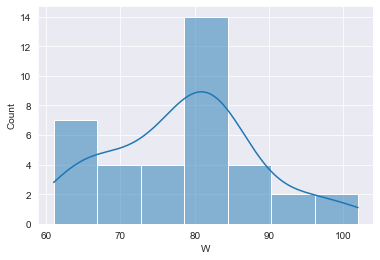

In [ ]:
sns.histplot(data = old_df['W'], kde=True)

<AxesSubplot:xlabel='W', ylabel='Count'>

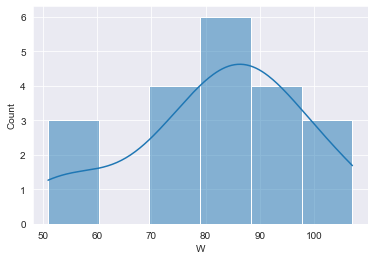

In [ ]:
sns.histplot(data = new_df['W'], kde=True)

<AxesSubplot:xlabel='L', ylabel='Count'>

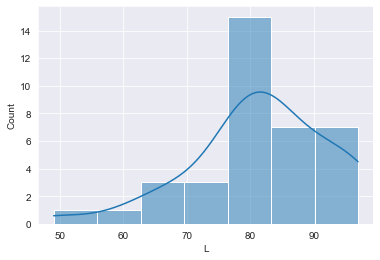

In [ ]:
sns.histplot(data = old_df['L'], kde=True)

<AxesSubplot:xlabel='L', ylabel='Count'>

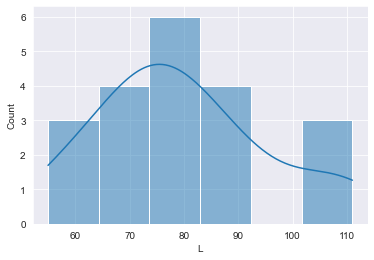

In [ ]:
sns.histplot(data = new_df['L'], kde=True)

<AxesSubplot:xlabel='L', ylabel='W'>

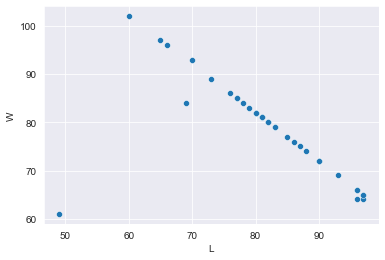

In [ ]:
sns.scatterplot(data = old_df, x = 'L', y = 'W')

<AxesSubplot:xlabel='L', ylabel='W'>

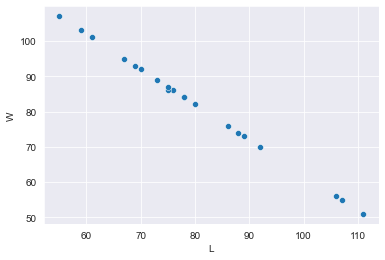

In [ ]:
sns.scatterplot(data = new_df, x = 'L', y = 'W')

<AxesSubplot:xlabel='H', ylabel='W'>

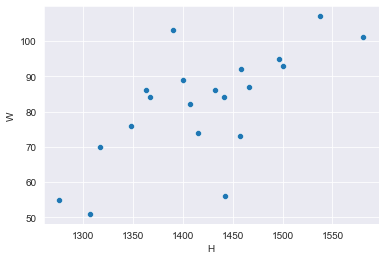

In [ ]:
sns.scatterplot(data = new_df, x = 'H', y = 'W')

<AxesSubplot:xlabel='H', ylabel='W'>

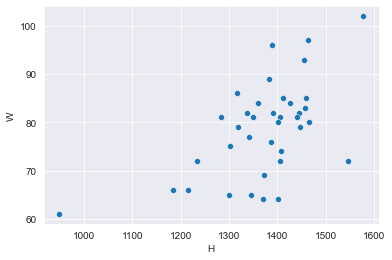

In [ ]:
sns.scatterplot(data = old_df, x = 'H', y = 'W')

<AxesSubplot:xlabel='HR', ylabel='W'>

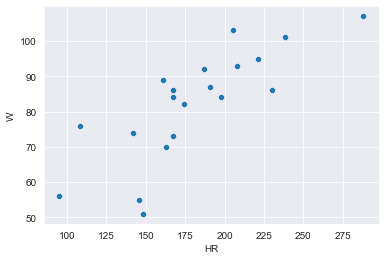

In [ ]:
sns.scatterplot(data = new_df, x = 'HR', y = 'W')

<AxesSubplot:xlabel='HR', ylabel='W'>

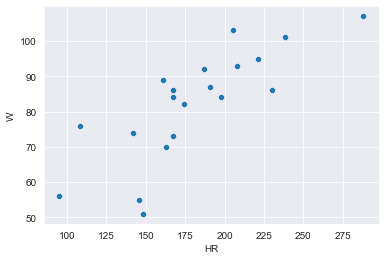

In [ ]:
sns.scatterplot(data = new_df, x = 'HR', y = 'W')

<AxesSubplot:xlabel='R/G', ylabel='W'>

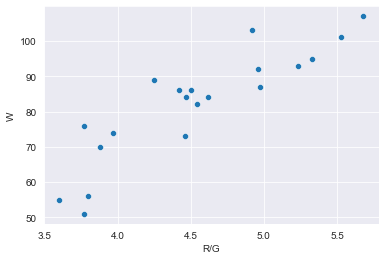

In [ ]:
sns.scatterplot(data = new_df, x = 'R/G', y = 'W')

<AxesSubplot:xlabel='RBI', ylabel='W'>

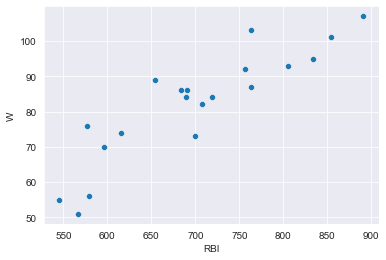

In [ ]:
sns.scatterplot(data = new_df, x = 'RBI', y = 'W')

<AxesSubplot:xlabel='E', ylabel='W'>

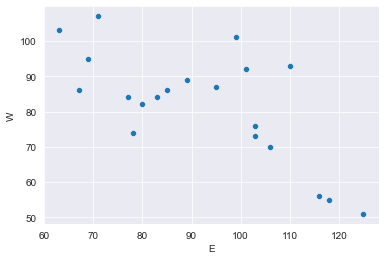

In [ ]:
sns.scatterplot(data = new_df, x = 'E', y = 'W')